In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
exp_rho = [-np.pi, np.pi]
# exp_z = [0.25, 0.45]
# exp_r = [0.37, 0.55]
exp_z = [0.25, 0.6]
exp_r = [0., 0.8]

In [3]:
rho_list = np.linspace(exp_rho[0],exp_rho[1],50)

In [4]:
r_list = np.linspace(exp_r[0],exp_r[1],10)

In [5]:
z_list = np.linspace(exp_z[0],exp_z[1],10)

In [6]:
points = np.vstack(np.meshgrid(rho_list,r_list,z_list)).reshape(3,-1).T

In [7]:
def convert_target(point):
    rho = point[0]
    r = point[1]
    z = point[2]

    x = r * np.cos(rho)
    y = r * np.sin(rho)

    return [-x, y, z]

In [8]:
points

array([[-3.14159265,  0.        ,  0.25      ],
       [-3.14159265,  0.        ,  0.28888889],
       [-3.14159265,  0.        ,  0.32777778],
       ...,
       [ 3.14159265,  0.8       ,  0.52222222],
       [ 3.14159265,  0.8       ,  0.56111111],
       [ 3.14159265,  0.8       ,  0.6       ]])

In [9]:
test_points = np.apply_along_axis(convert_target, 1, points)
test_points

array([[ 0.00000000e+00, -0.00000000e+00,  2.50000000e-01],
       [ 0.00000000e+00, -0.00000000e+00,  2.88888889e-01],
       [ 0.00000000e+00, -0.00000000e+00,  3.27777778e-01],
       ...,
       [ 8.00000000e-01,  9.79717439e-17,  5.22222222e-01],
       [ 8.00000000e-01,  9.79717439e-17,  5.61111111e-01],
       [ 8.00000000e-01,  9.79717439e-17,  6.00000000e-01]])

In [10]:
test_points.shape

(5000, 3)

In [11]:
np.savetxt(os.path.join("..","src","test_points.txt"),test_points)

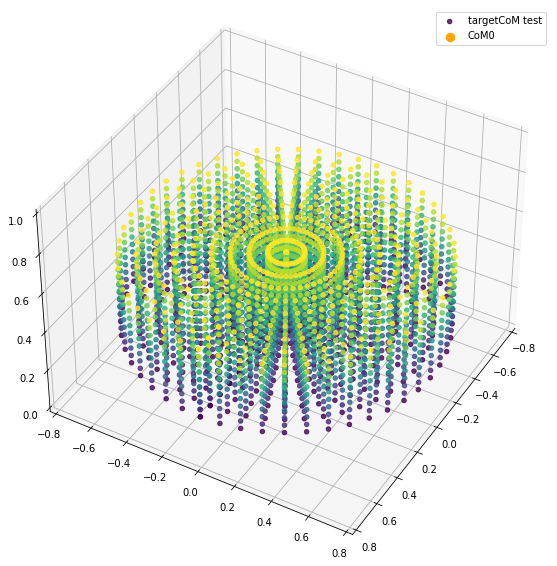

In [12]:
fig = fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.8,.8)
ax.set_ylim(-.8,.8)
ax.set_zlim(0,1)
ax.view_init(azim=30,elev=40)
ax.scatter(test_points[:,0],test_points[:,1],test_points[:,2],c=test_points[:,2], alpha=0.8, label="targetCoM test")
ax.scatter(-0.01303,0.00229,0.25252,linewidths=5,color="orange", label="CoM0")
ax.legend()